In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as pyran
%matplotlib inline

In [2]:
question=pd.read_csv('dataset_and_all/training_set_features.csv')
question

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [3]:
question.shape

(26707, 36)

In [4]:
question.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [5]:
output=pd.read_csv('dataset_and_all/training_set_labels.csv')
output

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [6]:
selectcols=question.loc[:,'behavioral_antiviral_meds':'behavioral_touch_face'].columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='median')
imputer = imputer.fit(question.loc[:,'behavioral_antiviral_meds':'behavioral_touch_face'])
question.loc[:,'behavioral_antiviral_meds':'behavioral_touch_face'] = imputer.transform(question.loc[:,'behavioral_antiviral_meds':'behavioral_touch_face'])
#for col in selectcols:
#   question[col]=question[col].fillna(0)

In [7]:
question.isna().sum()
question.behavioral_antiviral_meds.value_counts()

behavioral_antiviral_meds
0.0    25406
1.0     1301
Name: count, dtype: int64

In [8]:
pd.set_option('display.max_columns',40)

In [9]:
question[question.loc[:,'doctor_recc_xyz'].isna()]

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
76,76,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,4.0,2.0,2.0,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Not Married,Own,Employed,fpwskwrf,"MSA, Principle City",1.0,0.0,ldnlellj,xzmlyyjv
90,90,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,2.0,18 - 34 Years,College Graduate,Other or Multiple,Female,NaN,Not Married,Rent,Employed,lrircsnp,Non-MSA,0.0,0.0,fcxhlnwr,vlluhbov
94,94,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,35 - 44 Years,NaN,Hispanic,Female,NaN,NaN,NaN,NaN,kbazzjca,"MSA, Not Principle City",1.0,3.0,NaN,NaN
97,97,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Not Married,Own,Not in Labor Force,fpwskwrf,"MSA, Principle City",1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26675,26675,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,NaN,4.0,2.0,2.0,4.0,4.0,2.0,45 - 54 Years,NaN,White,Male,NaN,NaN,NaN,NaN,kbazzjca,Non-MSA,1.0,1.0,NaN,NaN
26679,26679,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,1.0,4.0,4.0,4.0,4.0,2.0,55 - 64 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,kbazzjca,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
26682,26682,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,4.0,4.0,4.0,4.0,4.0,1.0,45 - 54 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,2.0,vjjrobsf,hfxkjkmi
26692,26692,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,NaN,4.0,3.0,2.0,4.0,1.0,2.0,18 - 34 Years,< 12 Years,White,Female,Below Poverty,Not Married,Rent,Employed,atmpeygn,Non-MSA,1.0,2.0,ldnlellj,oijqvulv


In [10]:
question.doctor_recc_seasonal.value_counts(dropna=False)

doctor_recc_seasonal
0.0    16453
1.0     8094
NaN     2160
Name: count, dtype: int64

In [11]:
question['doctor_recc_xyz']=question['doctor_recc_xyz'].fillna(0)
question['doctor_recc_seasonal']=question['doctor_recc_seasonal'].fillna(0)

In [12]:
question['behavior']=0
for col in selectcols:
    question['behavior']=question['behavior']+question[col]

In [13]:
question1=question.drop(columns=selectcols).copy()

In [14]:
question1.health_insurance.value_counts(dropna=False)

health_insurance
1.0    12697
NaN    12274
0.0     1736
Name: count, dtype: int64

In [15]:
question1.child_under_6_months.value_counts(dropna=False)

child_under_6_months
0.0    23749
1.0     2138
NaN      820
Name: count, dtype: int64

In [16]:
question1['child_under_6_months']=question1.child_under_6_months.fillna(0.0)
question1['health_insurance']=question1.health_insurance.fillna(1.0)

In [17]:
question1.opinion_seas_vacc_effective.value_counts(dropna=False)

opinion_seas_vacc_effective
4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
NaN      462
Name: count, dtype: int64

In [18]:
question1['opinion_seas_vacc_effective']=question1.opinion_seas_vacc_effective.fillna(4.0)

In [19]:
question1.opinion_xyz_vacc_effective.value_counts(dropna=False)

opinion_xyz_vacc_effective
4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
NaN      391
Name: count, dtype: int64

In [20]:
question1['opinion_xyz_vacc_effective']=question1.opinion_xyz_vacc_effective.fillna(4.0)

In [21]:
question1.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition            971
child_under_6_months               0
health_worker                    804
health_insurance                   0
opinion_xyz_vacc_effective         0
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective        0
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
household_adults                 249
household_children               249
e

In [22]:
question1=question1.drop(columns=['marital_status','rent_or_own','race']).copy()

In [23]:
new=pd.merge(question1, output, on = "respondent_id", how = "inner").copy()

In [24]:
new.employment_industry.value_counts(dropna=False)

employment_industry
NaN         13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: count, dtype: int64

In [25]:
new.groupby('employment_industry').seasonal_vaccine.value_counts(dropna=False)

employment_industry  seasonal_vaccine
arjwrbjb             0                    470
                     1                    401
atmlpfrs             0                    579
                     1                    347
cfqqtusy             0                    207
                     1                    118
dotnnunm             0                    130
                     1                     71
fcxhlnwr             1                   1575
                     0                    893
haxffmxo             1                    125
                     0                     23
ldnlellj             0                    762
                     1                    469
mcubkhph             0                    192
                     1                     83
mfikgejo             0                    346
                     1                    268
msuufmds             0                     67
                     1                     57
nduyfdeo             0                    

In [26]:
new.employment_occupation.value_counts(dropna=False)

employment_occupation
NaN         13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: count, dtype: int64

In [27]:
new.groupby('employment_occupation').seasonal_vaccine.value_counts(dropna=False)

employment_occupation  seasonal_vaccine
bxpfxfdn               0                    181
                       1                    150
ccgxvspp               0                    221
                       1                    120
cmhcxjea               1                    858
                       0                    389
dcjcmpih               1                    125
                       0                     23
dlvbwzss               0                    131
                       1                     96
emcorrxb               0                    690
                       1                    580
haliazsg               1                    176
                       0                    120
hfxkjkmi               0                    438
                       1                    328
hodpvpew               0                    114
                       1                     94
kldqjyjy               0                    284
                       1                    185


In [28]:
new=new.drop(columns=['employment_industry','employment_occupation']).copy()

In [29]:
new.census_msa.value_counts(dropna=False)

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

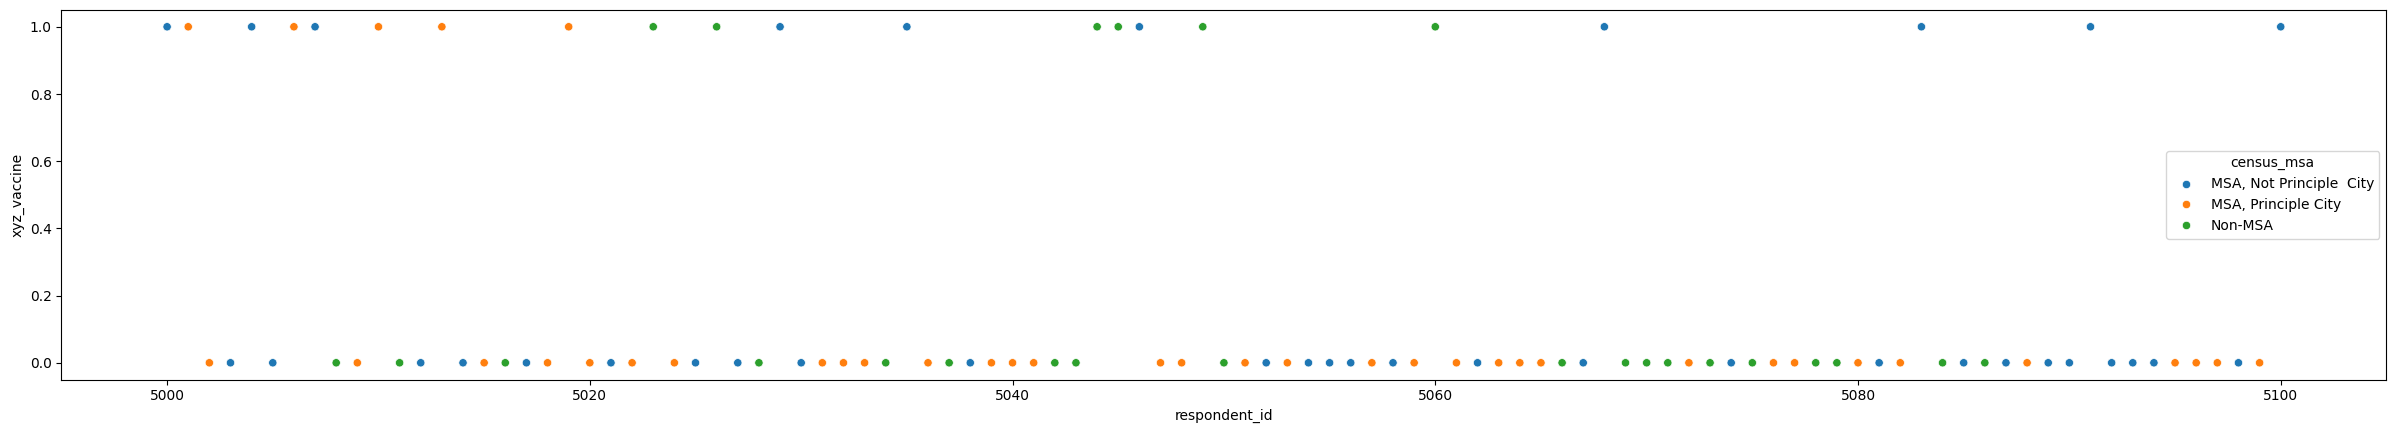

In [30]:
fig,ax=plt.subplots()
ax=sns.scatterplot(x='respondent_id',y='xyz_vaccine',data=new.loc[5000:5100,:],hue='census_msa')
fig.set_figwidth(30)
plt.show()

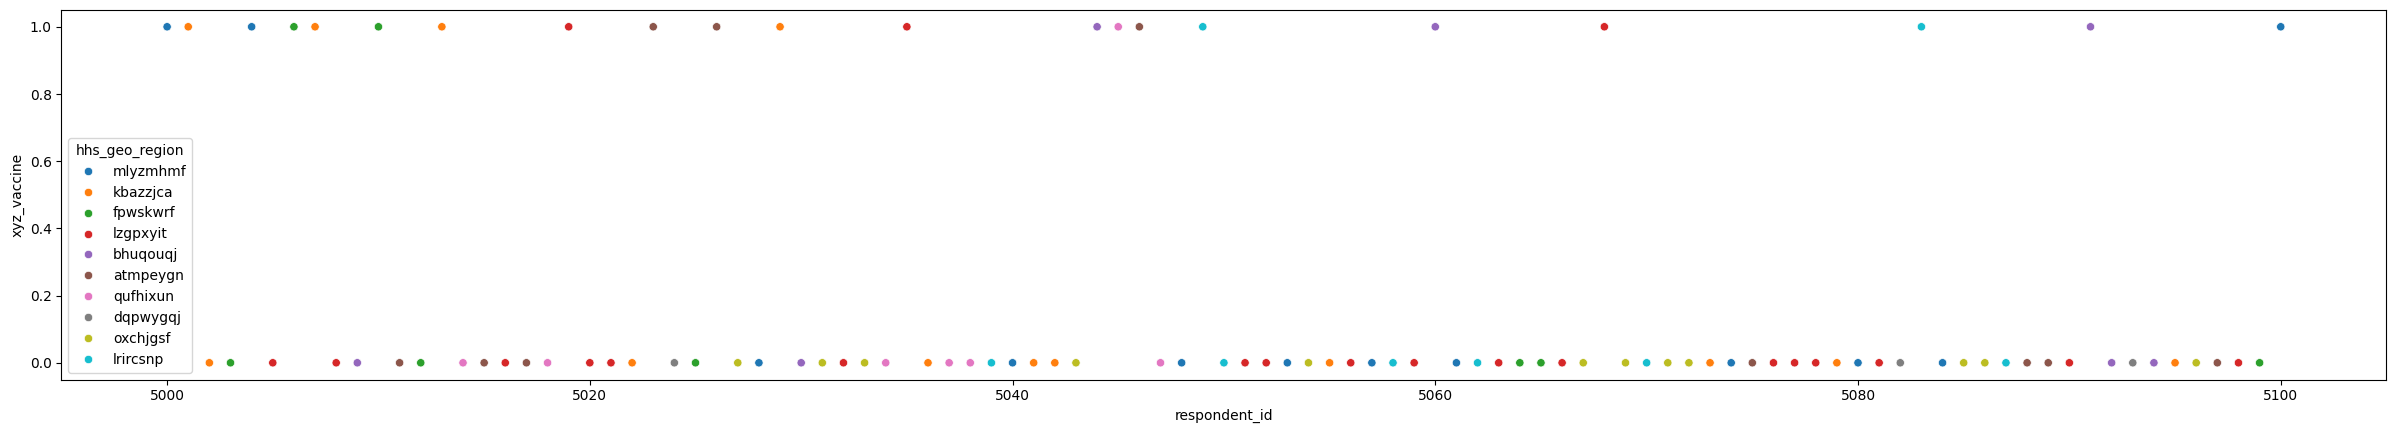

In [31]:
fig,ax=plt.subplots()
ax=sns.scatterplot(x='respondent_id',y='xyz_vaccine',data=new.loc[5000:5100,:],hue='hhs_geo_region')
fig.set_figwidth(30)
plt.show()

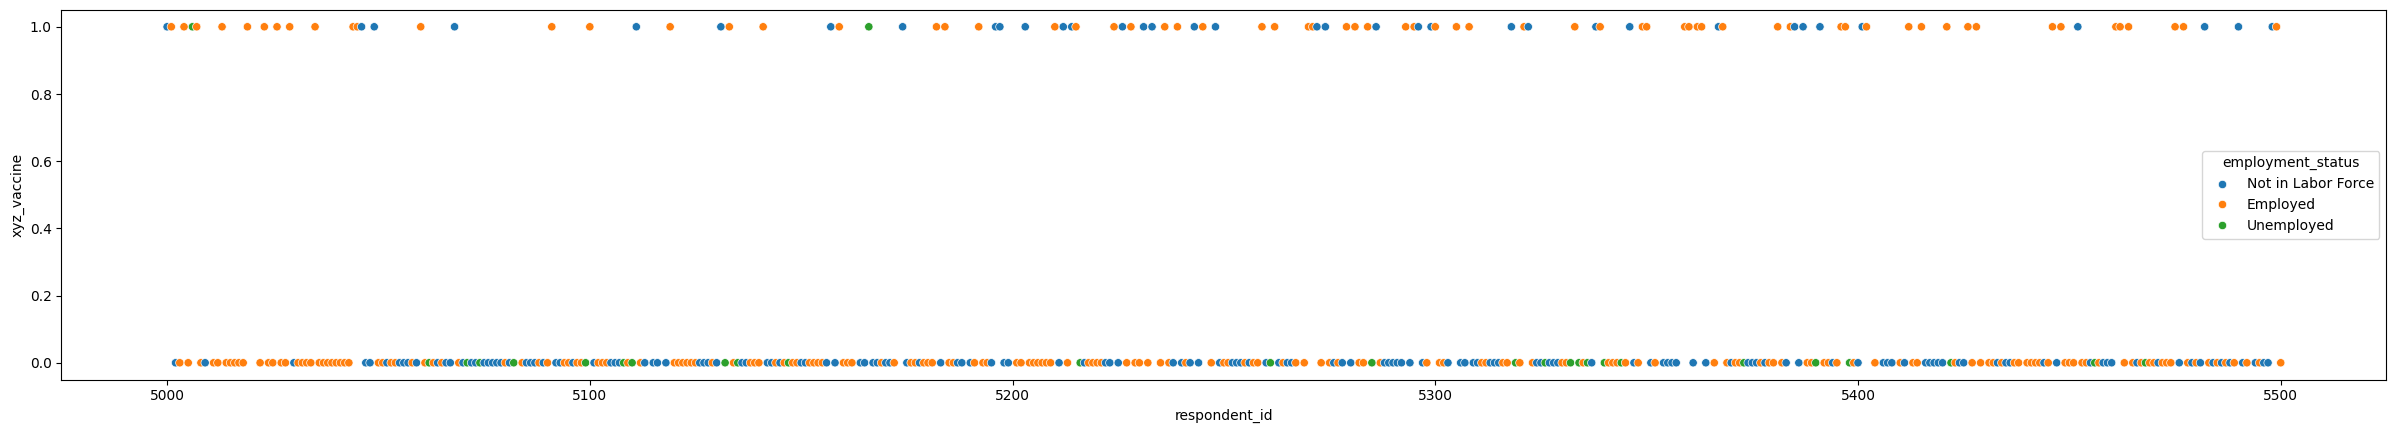

In [32]:
fig,ax=plt.subplots()
ax=sns.scatterplot(x='respondent_id',y='xyz_vaccine',data=new.loc[5000:5500,:],hue='employment_status')
fig.set_figwidth(30)
plt.show()

In [33]:
new[(new.employment_status=='Unemployed')&(new.xyz_vaccine==0)]

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,employment_status,hhs_geo_region,census_msa,household_adults,household_children,behavior,xyz_vaccine,seasonal_vaccine
24,24,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,18 - 34 Years,NaN,Male,NaN,Unemployed,oxchjgsf,Non-MSA,2.0,0.0,5.0,0,0
32,32,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,35 - 44 Years,Some College,Male,"<= $75,000, Above Poverty",Unemployed,lzgpxyit,"MSA, Principle City",1.0,2.0,3.0,0,1
53,53,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,College Graduate,Male,"<= $75,000, Above Poverty",Unemployed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0.0,0,1
54,54,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,2.0,4.0,4.0,4.0,18 - 34 Years,College Graduate,Female,NaN,Unemployed,dqpwygqj,"MSA, Not Principle City",0.0,1.0,5.0,0,0
59,59,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,5.0,5.0,4.0,1.0,4.0,35 - 44 Years,Some College,Female,Below Poverty,Unemployed,dqpwygqj,"MSA, Principle City",1.0,2.0,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26562,26562,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,5.0,2.0,1.0,65+ Years,Some College,Female,"<= $75,000, Above Poverty",Unemployed,fpwskwrf,"MSA, Principle City",0.0,0.0,5.0,0,1
26568,26568,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,4.0,2.0,2.0,45 - 54 Years,Some College,Female,NaN,Unemployed,lzgpxyit,"MSA, Not Principle City",1.0,2.0,6.0,0,0
26570,26570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,5.0,4.0,35 - 44 Years,< 12 Years,Male,Below Poverty,Unemployed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,2.0,0,0
26605,26605,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,35 - 44 Years,Some College,Female,"<= $75,000, Above Poverty",Unemployed,lrircsnp,"MSA, Principle City",1.0,0.0,0.0,0,0


In [34]:
new=new.drop(columns=['census_msa','hhs_geo_region']).copy()

In [35]:
new.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months              0
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective       0
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
sex                               0
income_poverty                 4423
employment_status              1463
household_adults                249
household_children              249
behavior                          0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [36]:
new.chronic_med_condition.value_counts(dropna=False)

chronic_med_condition
0.0    18446
1.0     7290
NaN      971
Name: count, dtype: int64

In [37]:
new[(new.chronic_med_condition==1) & (new.xyz_vaccine==0)].shape

(5282, 25)

In [38]:
new.sex.value_counts()

sex
Female    15858
Male      10849
Name: count, dtype: int64

In [39]:
new[(new.sex=='Male') & (new.xyz_vaccine==1)].shape

(2194, 25)

In [40]:
new=new.drop(columns='sex').copy()

In [41]:
new.employment_status.value_counts(dropna=False)

employment_status
Employed              13560
Not in Labor Force    10231
NaN                    1463
Unemployed             1453
Name: count, dtype: int64

In [42]:
new.groupby('employment_status').seasonal_vaccine.value_counts(dropna=False)

employment_status   seasonal_vaccine
Employed            0                   7839
                    1                   5721
Not in Labor Force  1                   5708
                    0                   4523
Unemployed          0                   1014
                    1                    439
Name: count, dtype: int64

In [43]:
new['employment_status']=new['employment_status'].fillna('Employed').copy()

In [44]:
for i in range(new.shape[0]):
    variable=new.loc[i,'employment_status']
    if variable=='Not in Labor Force':
        new.loc[i,'employment_status_weight']=3
    elif variable=='Employed':
        new.loc[i,'employment_status_weight']=2
    else:
        new.loc[i,'employment_status_weight']=1

In [45]:
new.employment_status_weight.value_counts(dropna=False)

employment_status_weight
2.0    15023
3.0    10231
1.0     1453
Name: count, dtype: int64

In [46]:
new=new.drop(columns='employment_status').copy()

In [47]:
new.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months              0
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective       0
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
income_poverty                 4423
household_adults                249
household_children              249
behavior                          0
xyz_vaccine                       0
seasonal_vaccine                  0
employment_status_weight          0
dtype: int64

In [48]:
new.household_adults.value_counts(dropna=False)

household_adults
1.0    14474
0.0     8056
2.0     2803
3.0     1125
NaN      249
Name: count, dtype: int64

In [49]:
new[(new.household_adults==3) & (new.xyz_vaccine==1)].shape

(222, 24)

In [50]:
new.household_children.value_counts(dropna=False)

household_children
0.0    18672
1.0     3175
2.0     2864
3.0     1747
NaN      249
Name: count, dtype: int64

In [51]:
new[(new.household_children==3) & (new.xyz_vaccine==1)].shape

(349, 24)

In [52]:
new['household_adults']=new['household_adults'].fillna(1.0).copy()
new['household_children']=new['household_children'].fillna(0.0).copy()

In [53]:
new.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months              0
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective       0
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
income_poverty                 4423
household_adults                  0
household_children                0
behavior                          0
xyz_vaccine                       0
seasonal_vaccine                  0
employment_status_weight          0
dtype: int64

In [54]:
new.income_poverty.value_counts(dropna=False)

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
NaN                           4423
Below Poverty                 2697
Name: count, dtype: int64

In [55]:
new[(new.income_poverty=='> $75,000') & (new.seasonal_vaccine==1)].shape

(3383, 24)

In [56]:
new[new.opinion_seas_risk!=np.nan].loc[:,'opinion_seas_risk'].agg(['mean'])#,'median','mode'])

mean    2.719162
Name: opinion_seas_risk, dtype: float64

In [57]:
new['opinion_xyz_risk']=new.opinion_xyz_risk.fillna(2.0)
new['opinion_xyz_sick_from_vacc']=new.opinion_xyz_sick_from_vacc.fillna(2.0)
new['opinion_seas_risk']=new.opinion_seas_risk.fillna(2.0)
new['opinion_seas_sick_from_vacc']=new.opinion_seas_sick_from_vacc.fillna(2.0)

In [58]:
new.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months              0
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
income_poverty                 4423
household_adults                  0
household_children                0
behavior                          0
xyz_vaccine                       0
seasonal_vaccine                  0
employment_status_weight          0
dtype: int64

In [59]:
new['opinion_xyz']=(6-new['opinion_xyz_vacc_effective'])+new['opinion_xyz_risk']+new['opinion_xyz_sick_from_vacc']
new['opinion_seas']=(6-new['opinion_seas_vacc_effective'])+new['opinion_seas_risk']+new['opinion_seas_sick_from_vacc']

In [60]:
new.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months              0
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
income_poverty                 4423
household_adults                  0
household_children                0
behavior                          0
xyz_vaccine                       0
seasonal_vaccine                  0
employment_status_weight          0
opinion_xyz                       0
opinion_seas                      0
dtype: int64

In [61]:
new=new.drop(columns=['opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc',
                 'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc']).copy()

In [62]:
new

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,income_poverty,household_adults,household_children,behavior,xyz_vaccine,seasonal_vaccine,employment_status_weight,opinion_xyz,opinion_seas
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,< 12 Years,Below Poverty,0.0,0.0,2.0,0,0,3.0,6.0,7.0
1,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,35 - 44 Years,12 Years,Below Poverty,0.0,0.0,4.0,0,1,2.0,9.0,8.0
2,2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",2.0,0.0,1.0,0,0,2.0,5.0,5.0
3,3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,65+ Years,12 Years,Below Poverty,0.0,0.0,3.0,0,1,3.0,11.0,6.0
4,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,45 - 54 Years,Some College,"<= $75,000, Above Poverty",1.0,0.0,4.0,0,0,2.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65+ Years,Some College,"<= $75,000, Above Poverty",0.0,0.0,2.0,0,0,3.0,5.0,5.0
26703,26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",1.0,0.0,2.0,0,0,2.0,6.0,3.0
26704,26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,Some College,NaN,0.0,0.0,5.0,0,1,2.0,8.0,7.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18 - 34 Years,Some College,"<= $75,000, Above Poverty",1.0,0.0,1.0,0,0,2.0,6.0,7.0


In [63]:
new.isna().sum()

respondent_id                  0
xyz_concern                   92
xyz_knowledge                116
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition        971
child_under_6_months           0
health_worker                804
health_insurance               0
age_group                      0
education                   1407
income_poverty              4423
household_adults               0
household_children             0
behavior                       0
xyz_vaccine                    0
seasonal_vaccine               0
employment_status_weight       0
opinion_xyz                    0
opinion_seas                   0
dtype: int64

In [64]:
new.xyz_concern.value_counts(dropna=False)

xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
NaN       92
Name: count, dtype: int64

In [65]:
new[new.xyz_concern!=np.nan].loc[:,'xyz_concern'].agg(['median'])#,'median','mode'])

median    2.0
Name: xyz_concern, dtype: float64

In [66]:
new.xyz_knowledge.value_counts(dropna=False)

xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
NaN      116
Name: count, dtype: int64

In [67]:
new[new.xyz_knowledge!=np.nan].loc[:,'xyz_knowledge'].agg(['mean'])#,'median','mode'])

mean    1.262532
Name: xyz_knowledge, dtype: float64

In [68]:
new['xyz_concern']=new['xyz_concern'].fillna(2.0)
new['xyz_knowledge']=new['xyz_knowledge'].fillna(1.0)

In [69]:
new.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition        971
child_under_6_months           0
health_worker                804
health_insurance               0
age_group                      0
education                   1407
income_poverty              4423
household_adults               0
household_children             0
behavior                       0
xyz_vaccine                    0
seasonal_vaccine               0
employment_status_weight       0
opinion_xyz                    0
opinion_seas                   0
dtype: int64

In [70]:
new.chronic_med_condition.value_counts(dropna=False)

chronic_med_condition
0.0    18446
1.0     7290
NaN      971
Name: count, dtype: int64

In [71]:
new.health_worker.value_counts(dropna=False)

health_worker
0.0    23004
1.0     2899
NaN      804
Name: count, dtype: int64

In [72]:
new['chronic_med_condition']=new['chronic_med_condition'].fillna(0.0)
new['health_worker']=new['health_worker'].fillna(0.0)

In [73]:
new.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
age_group                      0
education                   1407
income_poverty              4423
household_adults               0
household_children             0
behavior                       0
xyz_vaccine                    0
seasonal_vaccine               0
employment_status_weight       0
opinion_xyz                    0
opinion_seas                   0
dtype: int64

In [74]:
new.education.value_counts(dropna=False)

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
NaN                  1407
Name: count, dtype: int64

In [75]:
new[(new.education=='Some College') & (new.seasonal_vaccine==1)].shape

(3183, 20)

In [76]:
new['education']=new['education'].fillna('College Graduate').copy()

In [77]:
for i in range(new.shape[0]):
    variable=new.loc[i,'education']
    if variable=='College Graduate' or variable=='Some College':
        new.loc[i,'education_weight']=3
    elif variable=='12 Years':
        new.loc[i,'education_weight']=2
    else:
        new.loc[i,'education_weight']=1

In [78]:
new.education_weight.value_counts(dropna=False)

education_weight
3.0    18547
2.0     5797
1.0     2363
Name: count, dtype: int64

In [79]:
new=new.drop(columns='education').copy()

In [80]:
new.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
age_group                      0
income_poverty              4423
household_adults               0
household_children             0
behavior                       0
xyz_vaccine                    0
seasonal_vaccine               0
employment_status_weight       0
opinion_xyz                    0
opinion_seas                   0
education_weight               0
dtype: int64

In [81]:
new.income_poverty.value_counts(dropna=False)

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
NaN                           4423
Below Poverty                 2697
Name: count, dtype: int64

In [82]:
for i in range(new.shape[0]):
    variable=new.loc[i,'income_poverty']
    if variable=='<= $75,000, Above Poverty':
        new.loc[i,'income_poverty_weight']=2
    elif variable=='> $75,000':
        new.loc[i,'income_poverty_weight']=3
    elif variable=='Below Poverty':
        new.loc[i,'income_poverty_weight']=1
    else:
        new.loc[i,'income_poverty_weight']=2

In [83]:
new.income_poverty_weight.value_counts()

income_poverty_weight
2.0    17200
3.0     6810
1.0     2697
Name: count, dtype: int64

In [84]:
new=new.drop(columns='income_poverty').copy()

In [85]:
new.isna().sum()

respondent_id               0
xyz_concern                 0
xyz_knowledge               0
doctor_recc_xyz             0
doctor_recc_seasonal        0
chronic_med_condition       0
child_under_6_months        0
health_worker               0
health_insurance            0
age_group                   0
household_adults            0
household_children          0
behavior                    0
xyz_vaccine                 0
seasonal_vaccine            0
employment_status_weight    0
opinion_xyz                 0
opinion_seas                0
education_weight            0
income_poverty_weight       0
dtype: int64

In [86]:
new

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,household_adults,household_children,behavior,xyz_vaccine,seasonal_vaccine,employment_status_weight,opinion_xyz,opinion_seas,education_weight,income_poverty_weight
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,0.0,0.0,2.0,0,0,3.0,6.0,7.0,1.0,1.0
1,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,35 - 44 Years,0.0,0.0,4.0,0,1,2.0,9.0,8.0,2.0,1.0
2,2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,18 - 34 Years,2.0,0.0,1.0,0,0,2.0,5.0,5.0,3.0,2.0
3,3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,65+ Years,0.0,0.0,3.0,0,1,3.0,11.0,6.0,2.0,1.0
4,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,45 - 54 Years,1.0,0.0,4.0,0,0,2.0,8.0,8.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65+ Years,0.0,0.0,2.0,0,0,3.0,5.0,5.0,3.0,2.0
26703,26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,18 - 34 Years,1.0,0.0,2.0,0,0,2.0,6.0,3.0,3.0,2.0
26704,26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,0.0,0.0,5.0,0,1,2.0,8.0,7.0,3.0,2.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18 - 34 Years,1.0,0.0,1.0,0,0,2.0,6.0,7.0,3.0,2.0


In [87]:
new.age_group.value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [88]:
new.groupby('age_group').seasonal_vaccine.value_counts()

age_group      seasonal_vaccine
18 - 34 Years  0                   3731
               1                   1484
35 - 44 Years  0                   2453
               1                   1395
45 - 54 Years  0                   3136
               1                   2102
55 - 64 Years  1                   2844
               0                   2719
65+ Years      1                   4610
               0                   2233
Name: count, dtype: int64

In [89]:
for i in range(new.shape[0]):
    variable=new.loc[i,'age_group']
    if variable=='18 - 34 Years':
        new.loc[i,'age_group_weight']=3
    elif variable=='35 - 44 Years':
        new.loc[i,'age_group_weight']=4
    elif variable=='45 - 54 Years':
        new.loc[i,'age_group_weight']=4.5
    elif variable=='55 - 64 Years':
        new.loc[i,'age_group_weight']=6
    else:
        new.loc[i,'age_group_weight']=7.5

In [90]:
new.age_group_weight.value_counts()

age_group_weight
7.5    6843
6.0    5563
4.5    5238
3.0    5215
4.0    3848
Name: count, dtype: int64

In [91]:
new=new.drop(columns='age_group').copy()

In [92]:
new

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,household_adults,household_children,behavior,xyz_vaccine,seasonal_vaccine,employment_status_weight,opinion_xyz,opinion_seas,education_weight,income_poverty_weight,age_group_weight
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,3.0,6.0,7.0,1.0,1.0,6.0
1,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0,1,2.0,9.0,8.0,2.0,1.0,4.0
2,2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0,0,2.0,5.0,5.0,3.0,2.0,3.0
3,3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0,1,3.0,11.0,6.0,2.0,1.0,7.5
4,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0,0,2.0,8.0,8.0,3.0,2.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,3.0,5.0,5.0,3.0,2.0,7.5
26703,26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0,0,2.0,6.0,3.0,3.0,2.0,3.0
26704,26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0,1,2.0,8.0,7.0,3.0,2.0,6.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,2.0,6.0,7.0,3.0,2.0,3.0


In [93]:
new.dtypes

respondent_id                 int64
xyz_concern                 float64
xyz_knowledge               float64
doctor_recc_xyz             float64
doctor_recc_seasonal        float64
chronic_med_condition       float64
child_under_6_months        float64
health_worker               float64
health_insurance            float64
household_adults            float64
household_children          float64
behavior                    float64
xyz_vaccine                   int64
seasonal_vaccine              int64
employment_status_weight    float64
opinion_xyz                 float64
opinion_seas                float64
education_weight            float64
income_poverty_weight       float64
age_group_weight            float64
dtype: object

In [94]:
newtrain=new.drop(columns=['xyz_vaccine','seasonal_vaccine']).copy()

In [95]:
newtrain.shape

(26707, 18)

In [96]:
newtrain

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,household_adults,household_children,behavior,employment_status_weight,opinion_xyz,opinion_seas,education_weight,income_poverty_weight,age_group_weight
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,6.0,7.0,1.0,1.0,6.0
1,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,9.0,8.0,2.0,1.0,4.0
2,2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,5.0,5.0,3.0,2.0,3.0
3,3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,11.0,6.0,2.0,1.0,7.5
4,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,8.0,8.0,3.0,2.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,5.0,5.0,3.0,2.0,7.5
26703,26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,6.0,3.0,3.0,2.0,3.0
26704,26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,8.0,7.0,3.0,2.0,6.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,7.0,3.0,2.0,3.0


In [97]:
newtrain.to_csv('updatedtrain.csv',index=False)